In [214]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Load Data

In [215]:
!wget "https://raw.githubusercontent.com/fredysunjaya2/Liver-Disease/main/Liver%20Patient%20Dataset%20(LPD)_train.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [216]:
data = pd.read_csv("Liver Patient Dataset (LPD)_train.csv", encoding='unicode_escape')

In [217]:
data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


# Data Visualization

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [219]:
data.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Class Distribution where :

1 shows Liver Disease Detected

2 shows Non Liver Disease Detected

In [220]:
class_counts = data['Result'].value_counts()
print(class_counts)

Result
1    21917
2     8774
Name: count, dtype: int64


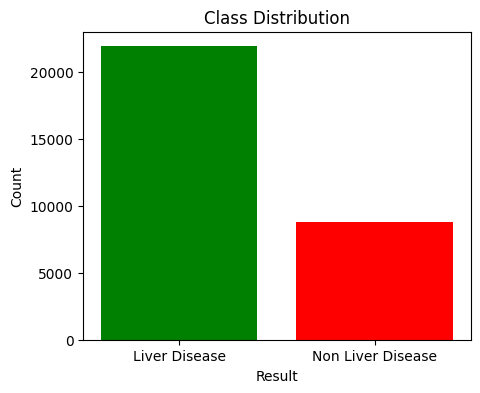

In [221]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
saved = plt.figure(figsize=(5,4))
colors = ['green', 'red']

plt.bar(['Liver Disease', 'Non Liver Disease'], class_counts.values, color=colors)
plt.xlabel("Result")
plt.ylabel("Count")
plt.title('Class Distribution')

plt.show()

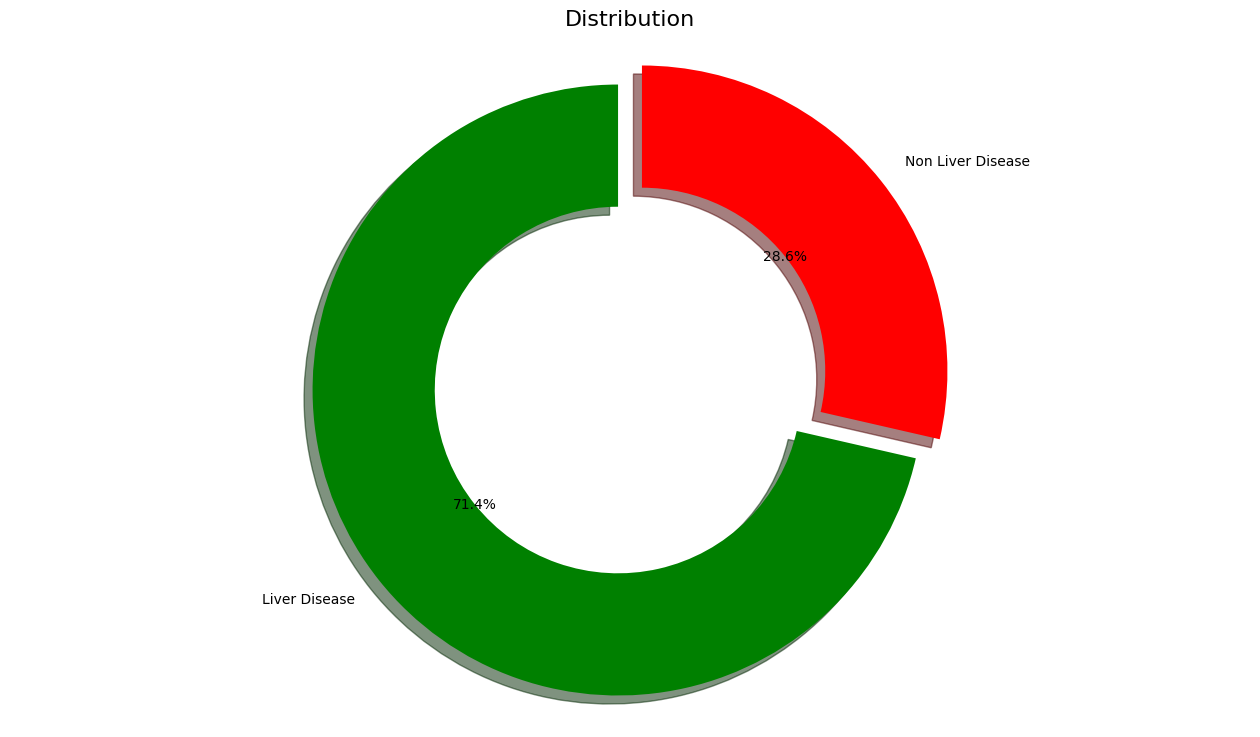

In [222]:
colors = ['green', 'red']
explode = (0, 0.1)
plt.pie(data['Result'].value_counts(), labels = ["Liver Disease", "Non Liver Disease"], autopct = '%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors, explode=explode, shadow=True)
fig = plt.gcf()

plt.axis('equal')
plt.title('Distribution', fontsize=16)

plt.show()

array([[<Axes: title={'center': 'Age of the patient'}>,
        <Axes: title={'center': 'Total Bilirubin'}>,
        <Axes: title={'center': 'Direct Bilirubin'}>],
       [<Axes: title={'center': '\xa0Alkphos Alkaline Phosphotase'}>,
        <Axes: title={'center': '\xa0Sgpt Alamine Aminotransferase'}>,
        <Axes: title={'center': 'Sgot Aspartate Aminotransferase'}>],
       [<Axes: title={'center': 'Total Protiens'}>,
        <Axes: title={'center': '\xa0ALB Albumin'}>,
        <Axes: title={'center': 'A/G Ratio Albumin and Globulin Ratio'}>],
       [<Axes: title={'center': 'Result'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x1200 with 0 Axes>

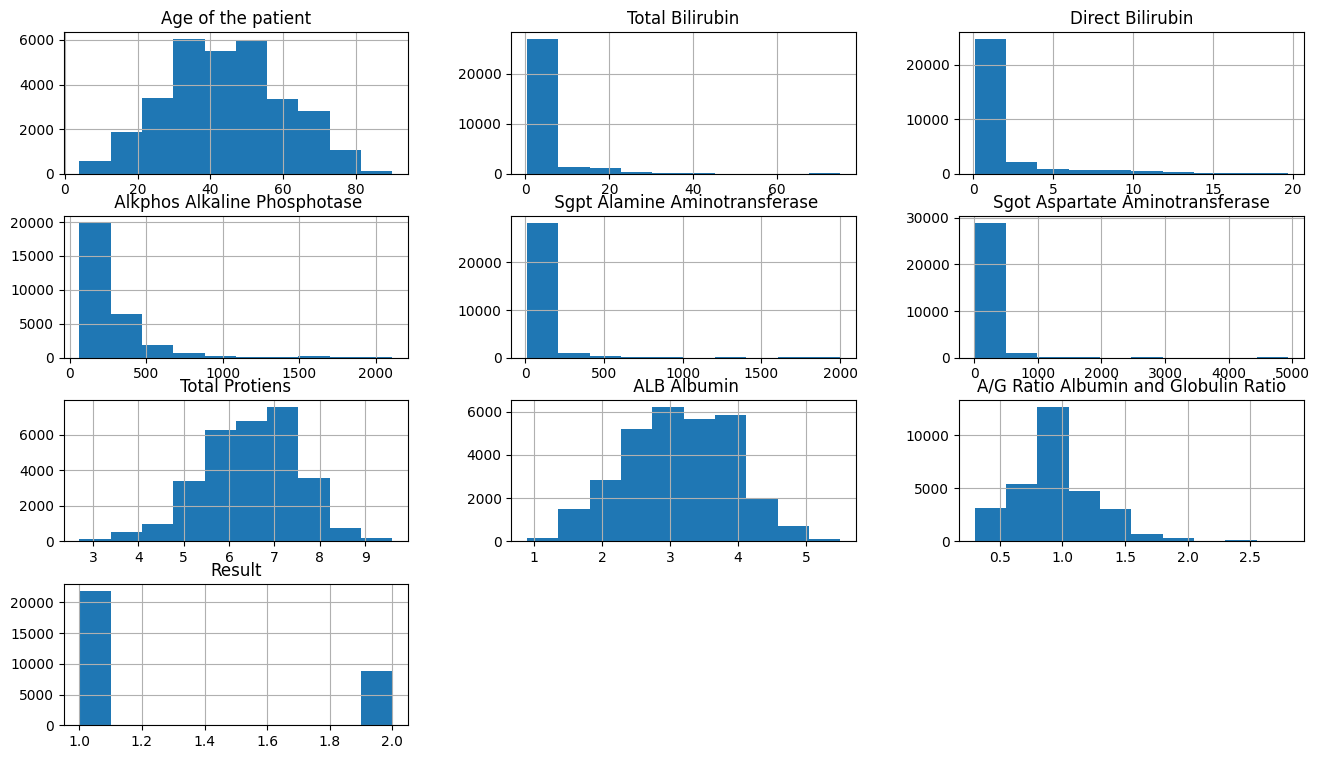

In [223]:
plt.figure(figsize=(15, 12))

data.hist()

c:\Users\bcamaster\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


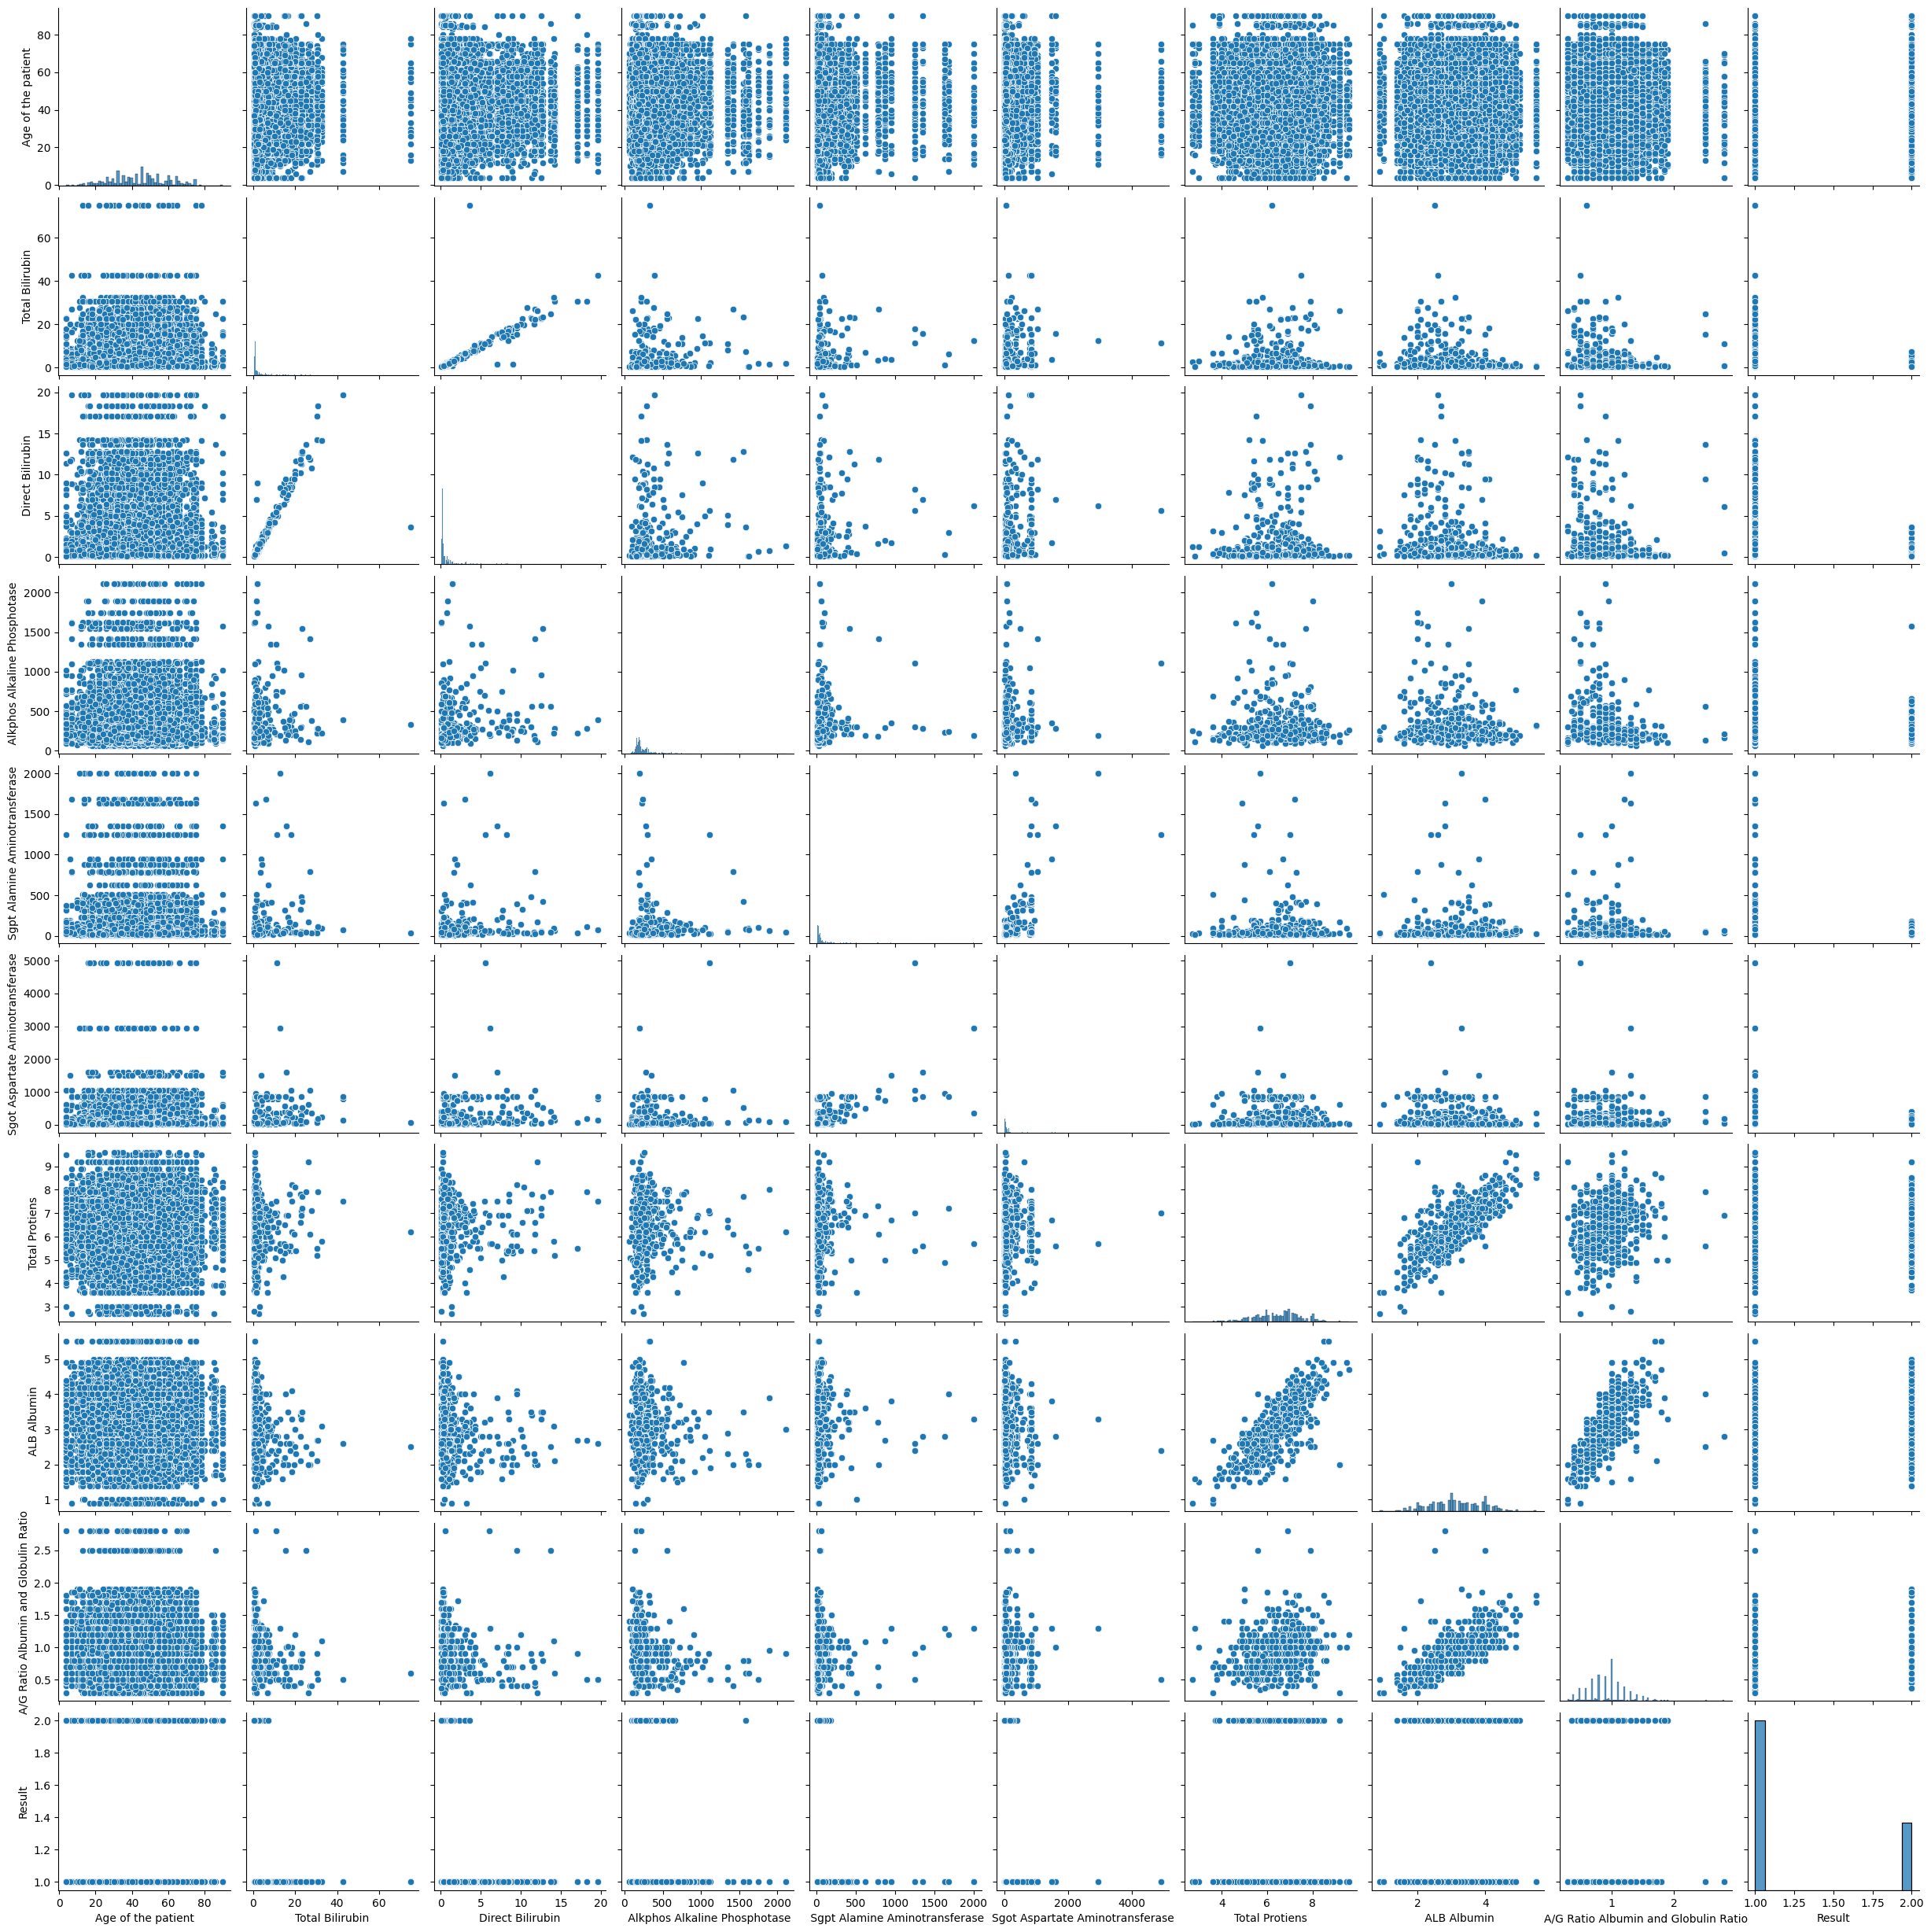

In [224]:
sb.pairplot(data);
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

# Data Preprocessing

In [225]:
data.shape

(30691, 11)

In [226]:
data.isnull().any()

Age of the patient                       True
Gender of the patient                    True
Total Bilirubin                          True
Direct Bilirubin                         True
 Alkphos Alkaline Phosphotase            True
 Sgpt Alamine Aminotransferase           True
Sgot Aspartate Aminotransferase          True
Total Protiens                           True
 ALB Albumin                             True
A/G Ratio Albumin and Globulin Ratio     True
Result                                  False
dtype: bool

In [227]:
data.isna().any()

Age of the patient                       True
Gender of the patient                    True
Total Bilirubin                          True
Direct Bilirubin                         True
 Alkphos Alkaline Phosphotase            True
 Sgpt Alamine Aminotransferase           True
Sgot Aspartate Aminotransferase          True
Total Protiens                           True
 ALB Albumin                             True
A/G Ratio Albumin and Globulin Ratio     True
Result                                  False
dtype: bool

In [228]:
data.duplicated().any()

True

In [229]:
data.drop_duplicates()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
29974,58.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
29976,28.0,Male,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1


In [230]:
data.loc[data["Result"] == 1, "Result"] = 0
data.loc[data["Result"] == 2,"Result"]= 1

In [231]:
data_numerik = data.select_dtypes(exclude=object)
data_kategorik = data.select_dtypes(include=object)

In [232]:
# Fill data
for i in data:
  if i in data_numerik :
    data[i] = data[i].fillna(data[i].mean())
  elif i in data_kategorik :
    data[i] = data[i].fillna(data[i].mode())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30691 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30691 non-null  float64
 3   Direct Bilirubin                      30691 non-null  float64
 4    Alkphos Alkaline Phosphotase         30691 non-null  float64
 5    Sgpt Alamine Aminotransferase        30691 non-null  float64
 6   Sgot Aspartate Aminotransferase       30691 non-null  float64
 7   Total Protiens                        30691 non-null  float64
 8    ALB Albumin                          30691 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30691 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [233]:
# save skewed features
skewed_cols = ['A/G Ratio Albumin and Globulin Ratio', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase']

# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    data[c] = data[c].apply('log1p')

In [234]:
# HANDLING DATA KATEGORIK
encode = LabelEncoder()

for i in data_kategorik :
  data[i] = encode.fit_transform(data[i])

data.dtypes

Age of the patient                      float64
Gender of the patient                     int32
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

In [235]:
for col in data.columns:
  if col in data_numerik:
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)
    iqr = q3 - q1
    upperLimit = q3 + 1.5 * iqr
    lowerLimit = q1 - 1.5 * iqr

    data = data.loc[(data[col] <= upperLimit) & (data[col] >= lowerLimit)]

# Feature Selection

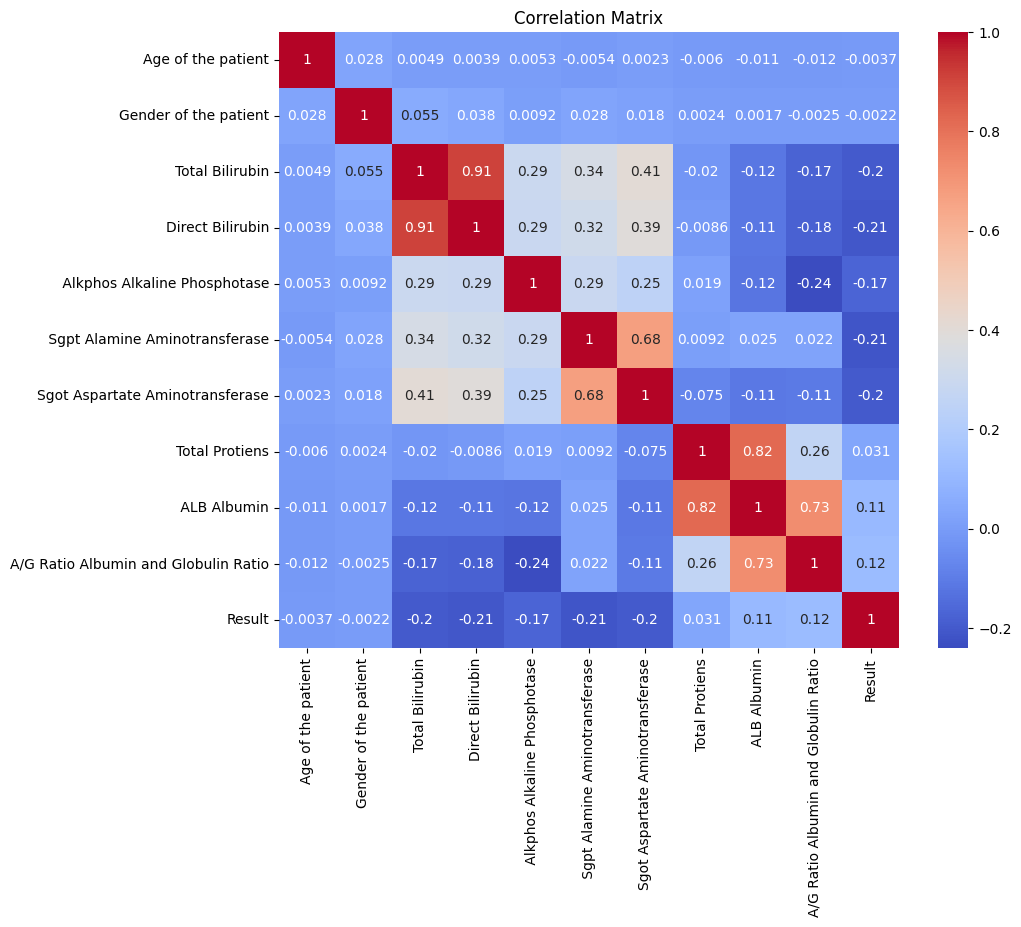

In [236]:
# CORRELATION MATRIX
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [237]:
abs_corr = abs(corr_matrix['Result'])
high_corr = abs_corr[abs_corr >= 0.15]
chosen_features = [col for col in data.columns if col in high_corr]

chosen_features

['Total Bilirubin',
 'Direct Bilirubin',
 '\xa0Alkphos Alkaline Phosphotase',
 '\xa0Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Result']

In [238]:
X = data[chosen_features]
Y = data['Result']
X = X.drop("Result", axis=1)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# bb_Y_train = Y_train

# TRAINING MODEL

In [239]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

1. SVM

In [240]:
nSVM = 4

parameters5 = {'svm__kernel': ["linear", "poly", "rbf", "sigmoid"]}
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['svm', SVC()]])

stratified_kfold5 = StratifiedKFold(n_splits=nSVM,
                                       shuffle=True,
                                       random_state=42)

clf5 = GridSearchCV(estimator=pipeline,
                           param_grid=parameters5,
                           scoring='roc_auc',
                           cv=stratified_kfold5,
                           n_jobs=-1)

# Perform grid search
clf5.fit(X_train, Y_train)

print("Best Parameters:", clf5.best_params_)
print("Best Score:", clf5.best_score_)
currentSVM = clf5.best_estimator_

Best Parameters: {'svm__kernel': 'rbf'}
Best Score: 0.8228920068601127


In [241]:
svm_score = currentSVM.score(X_train, Y_train) * 100
svm_score_test = currentSVM.score(X_test, Y_test) * 100

print('SVM Score: \n', svm_score)
print('SVM Test Score: \n', svm_score_test)

SVM Score: 
 69.90471894908947
SVM Test Score: 
 69.94363021420519


2. Decision Tree

In [242]:
nDT = 4
DTs = 40

parameters = {'tree__max_depth': np.delete(np.arange(DTs), 0)}
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['tree', DecisionTreeClassifier()]])

stratified_kfold = StratifiedKFold(n_splits=nDT,
                                       shuffle=True,
                                       random_state=42)

clf = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

# Perform grid search
clf.fit(X_train, Y_train)

print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
currentDT = clf.best_estimator_

Best Parameters: {'tree__max_depth': 35}
Best Score: 0.987228106096076


In [243]:
decision_tree_score = currentDT.score(X_train, Y_train) * 100
decision_tree_score_test = currentDT.score(X_test, Y_test) * 100

print('Decision Tree Score: \n', decision_tree_score)
print('Decision Tree Test Score: \n', decision_tree_score_test)

Decision Tree Score: 
 99.97744827197384
Decision Tree Test Score: 
 99.14317925591882


3. Logistic Regression

In [244]:
nLR = 4

parameters4 = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pipeline4 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['lr', LogisticRegression()]])

stratified_kfold4 = StratifiedKFold(n_splits=nLR,
                                       shuffle=True,
                                       random_state=42)

clf4 = GridSearchCV(estimator=pipeline4,
                           param_grid=parameters4,
                           scoring='roc_auc',
                           cv=stratified_kfold4,
                           n_jobs=-1)

# Perform grid search
clf4.fit(X_train, Y_train)

print("Best Parameters:", clf4.best_params_)
print("Best Score:", clf4.best_score_)
currentLR = clf4.best_estimator_

Best Parameters: {'lr__C': 0.01}
Best Score: 0.6624986116159979


In [245]:
logistic_regression_score = currentLR.score(X_train, Y_train) * 100
logistic_regression_score_test = currentLR.score(X_test, Y_test) * 100

print('Logistic Regression Score: \n', logistic_regression_score)
print('Logistic Regression Test Score: \n', logistic_regression_score_test)

Logistic Regression Score: 
 59.28285504876811
Logistic Regression Test Score: 
 59.301014656144304


4. KNN

In [246]:
nKNN = 4
KNNs = 40

parameters3 = {'knn__n_neighbors': np.delete(np.arange(KNNs), 0)}
pipeline3 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['knn', KNeighborsClassifier()]])

stratified_kfold3 = StratifiedKFold(n_splits=nKNN,
                                       shuffle=True,
                                       random_state=42)

clf3 = GridSearchCV(estimator=pipeline3,
                           param_grid=parameters3,
                           scoring='roc_auc',
                           cv=stratified_kfold3,
                           n_jobs=-1)

# Perform grid search
clf3.fit(X_train, Y_train)

print("Best Parameters:", clf3.best_params_)
print("Best Score:", clf3.best_score_)
currentKNN = clf3.best_estimator_

Best Parameters: {'knn__n_neighbors': 15}
Best Score: 0.9964205095479789


In [247]:
knn_score = currentKNN.score(X_train, Y_train) * 100
knn_score_test = currentKNN.score(X_test, Y_test) * 100

print('KNN Score: \n', knn_score)
print('KNN Test Score: \n', knn_score_test)

KNN Score: 
 98.06618932175678
KNN Test Score: 
 97.65501691093574


5. Random Forest

In [248]:
nRF = 4
RFs = 40

parameters2 = {'forest__max_depth': np.delete(np.arange(RFs), 0)}

pipeline2 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['forest', RandomForestClassifier()]])

stratified_kfold2 = StratifiedKFold(n_splits=nRF,
                                       shuffle=True,
                                       random_state=42)

clf2 = GridSearchCV(estimator=pipeline2,
                           param_grid=parameters2,
                           scoring='roc_auc',
                           cv=stratified_kfold2,
                           n_jobs=-1)

# Perform grid search
clf2.fit(X_train, Y_train)

print("Best Parameters:", clf2.best_params_)
print("Best Score:", clf2.best_score_)
currentRF = clf2.best_estimator_

Best Parameters: {'forest__max_depth': 35}
Best Score: 0.9994585931643676


In [249]:
random_forest_score = currentRF.score(X_train, Y_train) * 100
random_forest_score_test = currentRF.score(X_test, Y_test) * 100

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)

Random Forest Score: 
 99.97744827197384
Random Forest Test Score: 
 99.18827508455468


6. XGBoost

In [250]:
nXGB = 4
XGBs = 40

parameters6 = {'XGB__max_depth': np.delete(np.arange(XGBs), 0)}

pipeline6 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['XGB', XGBClassifier()]])

stratified_kfold6 = StratifiedKFold(n_splits=nXGB,
                                       shuffle=True,
                                       random_state=42)

clf6 = GridSearchCV(estimator=pipeline6,
                           param_grid=parameters6,
                           scoring='roc_auc',
                           cv=stratified_kfold6,
                           n_jobs=-1)

# Perform grid search
clf6.fit(X_train, Y_train)

print("Best Parameters:", clf6.best_params_)
print("Best Score:", clf6.best_score_)
currentXGB = clf6.best_estimator_

Best Parameters: {'XGB__max_depth': 7}
Best Score: 0.9993663453226505


In [251]:
XGBoost_Score = currentXGB.score(X_train, Y_train) * 100
XGBoost_Score_test = currentXGB.score(X_test, Y_test) * 100

print('XGBoost Score: \n', XGBoost_Score)
print('XGBoost Test Score: \n', XGBoost_Score_test)

XGBoost Score: 
 99.95489654394768
XGBoost Test Score: 
 99.39120631341602


# EVALUATE MODEL

In [252]:
from sklearn.metrics import accuracy_score

svm_predictions = currentSVM.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)

decision_tree_predictions = currentDT.predict(X_test)
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)

logistic_regression_predictions = currentLR.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)

knn_predictions = currentKNN.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_predictions)

random_forest_predictions = currentRF.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)

XGBoost_predictions = currentXGB.predict(X_test)
XGBoost_accuracy = accuracy_score(Y_test, XGBoost_predictions)

In [253]:
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("XGBoost Accuracy:", XGBoost_accuracy)

SVM Accuracy: 0.6994363021420519
Decision Tree Accuracy: 0.9914317925591882
Logistic Regression Accuracy: 0.593010146561443
K-Nearest Neighbors Accuracy: 0.9765501691093574
Random Forest Accuracy: 0.9918827508455468
XGBoost Accuracy: 0.9939120631341601


# Evaluation

In [254]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error

1. SVM

<Axes: >

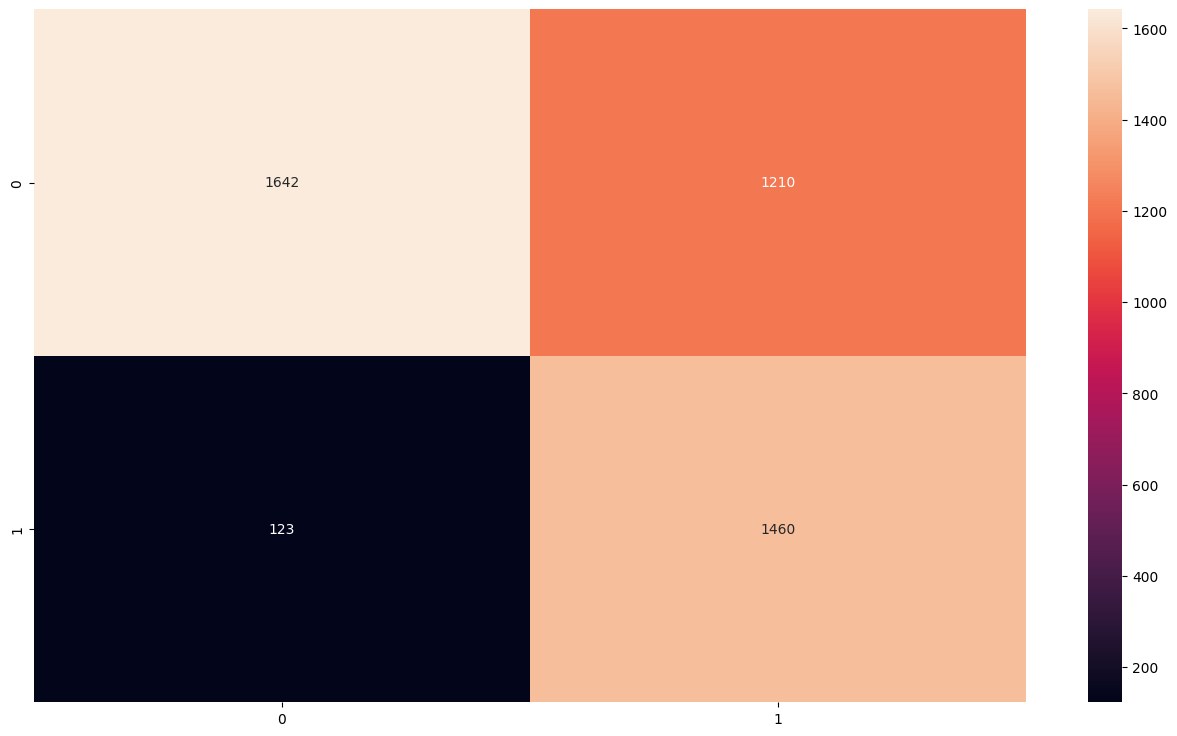

In [255]:
cm = confusion_matrix(Y_test, svm_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [256]:
f1 = f1_score(Y_test, svm_predictions)
recall = recall_score(Y_test, svm_predictions)
precision = precision_score(Y_test, svm_predictions)
mae = mean_absolute_error(Y_test, svm_predictions)
rmse = mean_squared_error(Y_test, svm_predictions, squared=False)

In [257]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.6865741829296967
Recall :  0.9222994314592545
Precision :  0.5468164794007491
Mean Absolute Error :  0.3005636978579481
Mean Squared Error :  0.5482368993947307


2. Decision Tree

<Axes: >

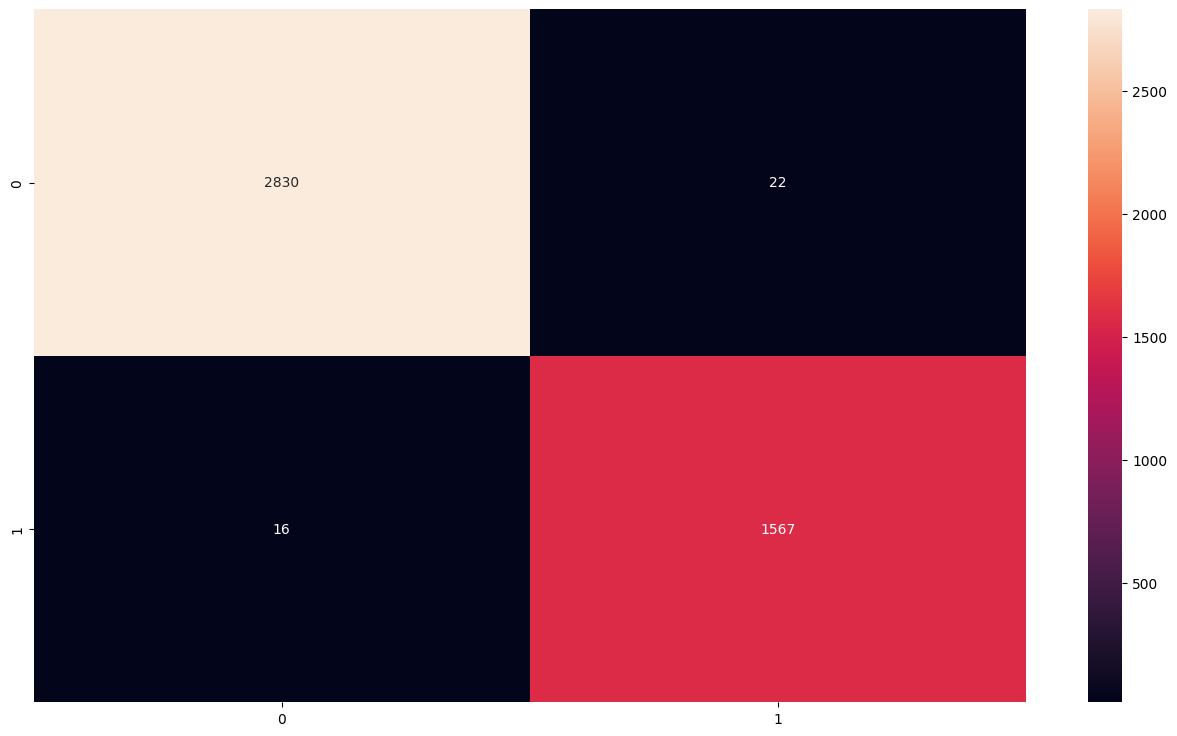

In [258]:
cm = confusion_matrix(Y_test, decision_tree_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [259]:
f1 = f1_score(Y_test, decision_tree_predictions)
recall = recall_score(Y_test, decision_tree_predictions)
precision = precision_score(Y_test, decision_tree_predictions)
mae = mean_absolute_error(Y_test, decision_tree_predictions)
rmse = mean_squared_error(Y_test, decision_tree_predictions, squared=False)

In [260]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.9880201765447667
Recall :  0.9898926089703095
Precision :  0.9861548143486469
Mean Absolute Error :  0.008568207440811725
Mean Squared Error :  0.09256461224902163


3. Logistic Regression

<Axes: >

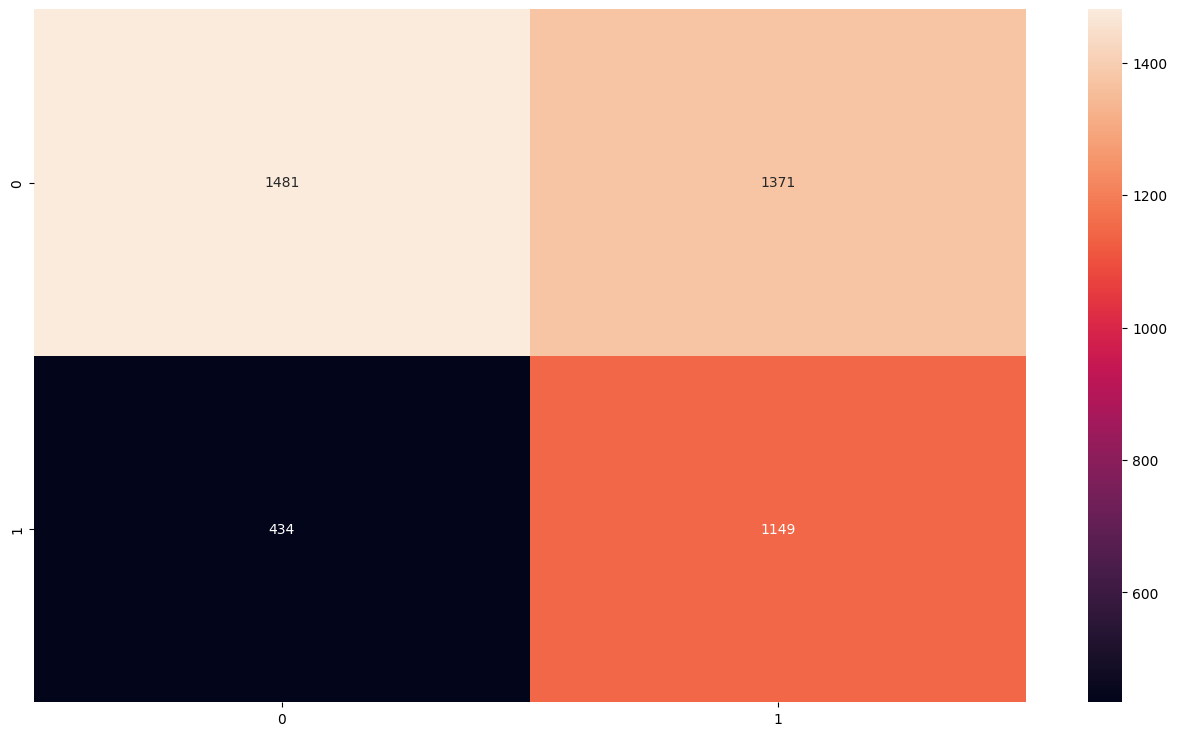

In [261]:
cm = confusion_matrix(Y_test, logistic_regression_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [262]:
f1 = f1_score(Y_test, logistic_regression_predictions)
recall = recall_score(Y_test, logistic_regression_predictions)
precision = precision_score(Y_test, logistic_regression_predictions)
mae = mean_absolute_error(Y_test, logistic_regression_predictions)
rmse = mean_squared_error(Y_test, logistic_regression_predictions, squared=False)

In [263]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.5600779917133804
Recall :  0.7258370183196462
Precision :  0.45595238095238094
Mean Absolute Error :  0.4069898534385569
Mean Squared Error :  0.6379575639794209


In [264]:
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,Y_train)
y_test_prediction=classifier.predict(X_test)
y_test_prediction

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [265]:
comparison=pd.DataFrame({'Actual':Y_test,'Predicted':y_test_prediction})
comparison[0:10]

,Actual,Predicted
12997,0,0
10871,1,1
7232,1,0
3404,1,1
18592,0,0
2762,0,0
21284,1,0
28273,1,1
21494,1,0
7651,0,0


4. KNN

<Axes: >

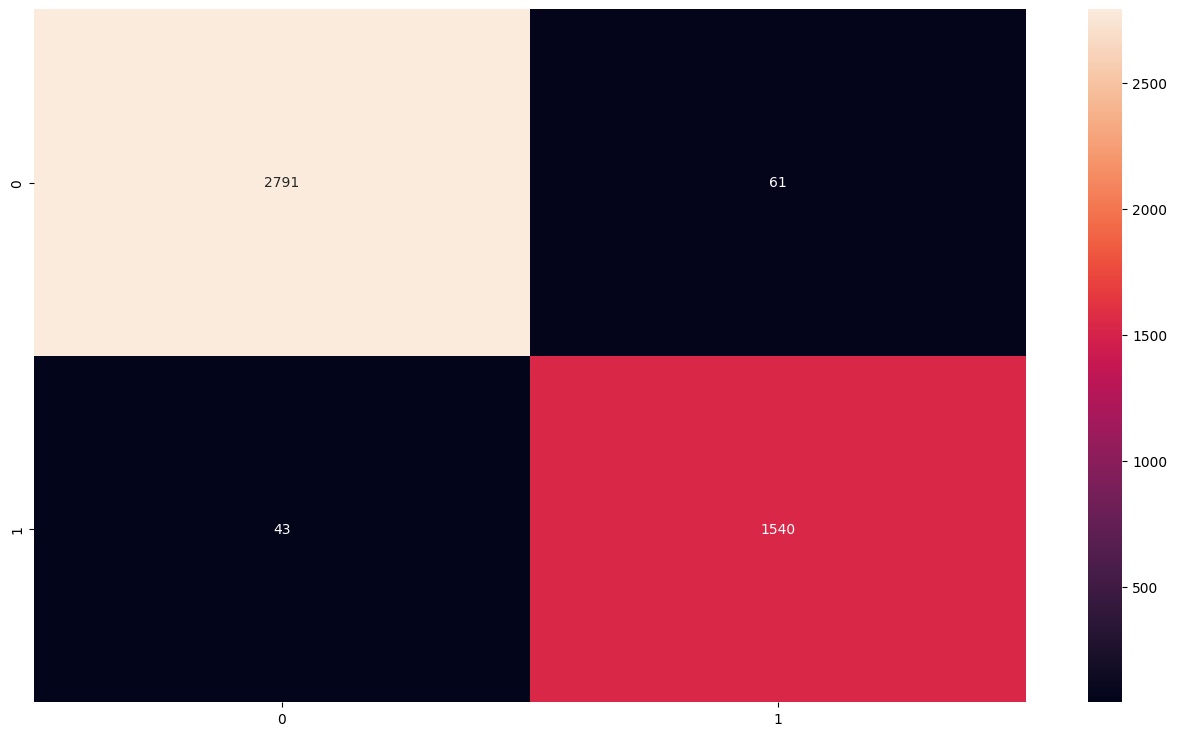

In [266]:
cm = confusion_matrix(Y_test, knn_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [267]:
f1 = f1_score(Y_test, knn_predictions)
recall = recall_score(Y_test, knn_predictions)
precision = precision_score(Y_test, knn_predictions)
mae = mean_absolute_error(Y_test, knn_predictions)
rmse = mean_squared_error(Y_test, knn_predictions, squared=False)

In [268]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.9673366834170855
Recall :  0.9728363866077069
Precision :  0.9618988132417239
Mean Absolute Error :  0.023449830890642617
Mean Squared Error :  0.1531333761485151


5. Random Forest

<Axes: >

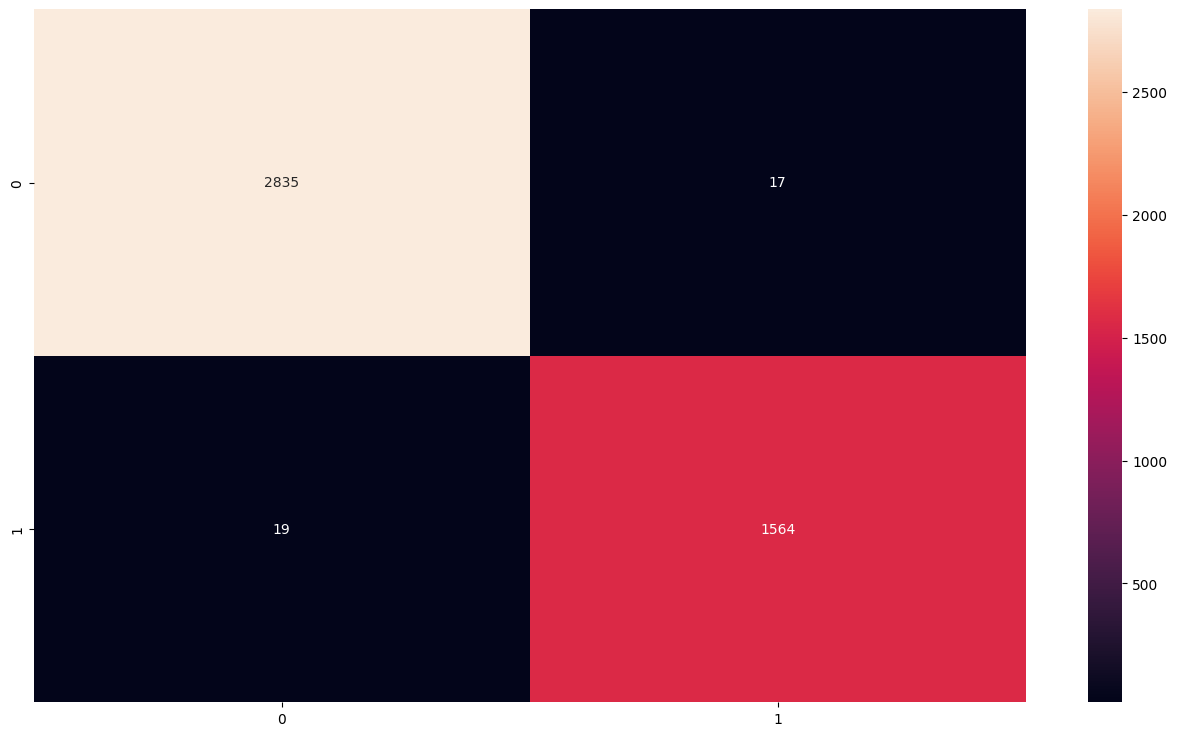

In [269]:
cm = confusion_matrix(Y_test,random_forest_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [270]:
f1 = f1_score(Y_test, random_forest_predictions)
recall = recall_score(Y_test, random_forest_predictions)
precision = precision_score(Y_test, random_forest_predictions)
mae = mean_absolute_error(Y_test, random_forest_predictions)
rmse = mean_squared_error(Y_test, random_forest_predictions, squared=False)

In [271]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.988621997471555
Recall :  0.9879974731522426
Precision :  0.989247311827957
Mean Absolute Error :  0.008117249154453212
Mean Squared Error :  0.09009577767272567


6. XGBoost

<Axes: >

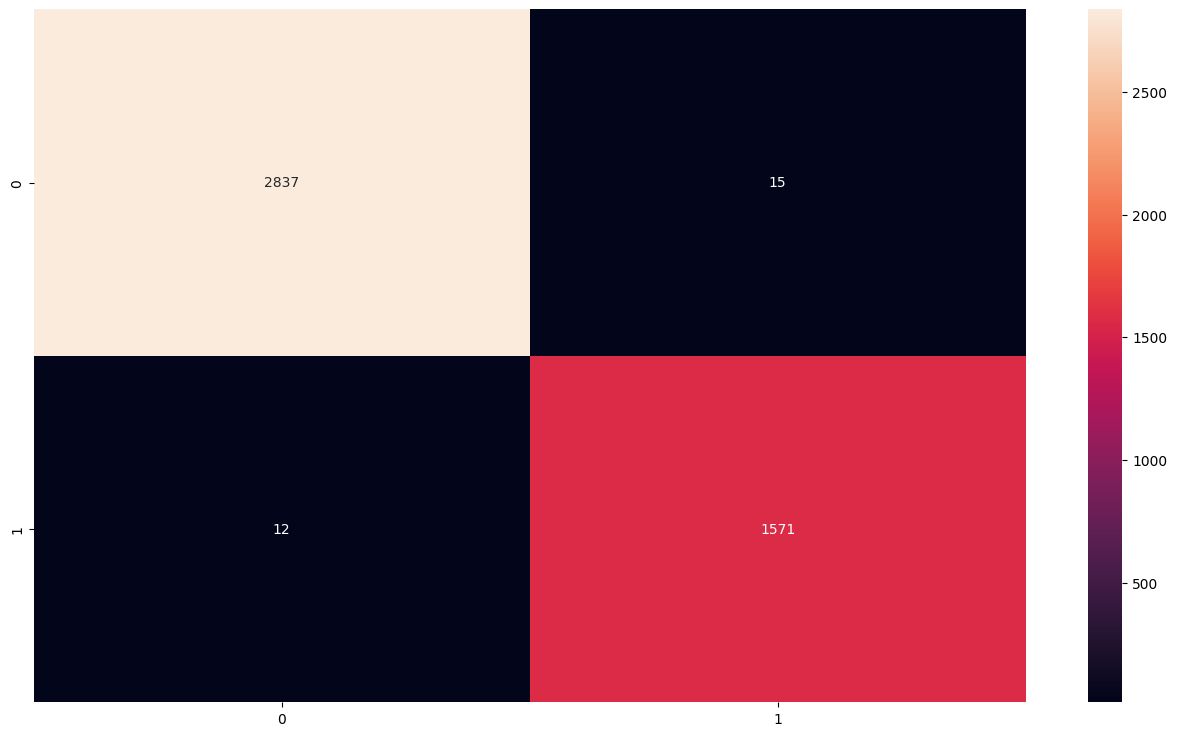

In [272]:
cm = confusion_matrix(Y_test,XGBoost_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [273]:
f1 = f1_score(Y_test, XGBoost_predictions)
recall = recall_score(Y_test, XGBoost_predictions)
precision = precision_score(Y_test, XGBoost_predictions)
mae = mean_absolute_error(Y_test, XGBoost_predictions)
rmse = mean_squared_error(Y_test, XGBoost_predictions, squared=False)

In [274]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.991479962133165
Recall :  0.9924194567277321
Precision :  0.9905422446406053
Mean Absolute Error :  0.00608793686583991
Mean Squared Error :  0.07802523223829526
